In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.replace({'target': {0 : 1, 1 : 0}}, inplace = True)

In [3]:
df_y = df.target.to_numpy()
df_x= df 
df_x = df_x.drop(columns = {"target"}).to_numpy()

In [4]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(df_x, df_y,
                                test_size=0.2,
                                )

In [5]:
#normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    
    keras.layers.Dense(1, activation='sigmoid' )  # Couche de sortie sans activation pour la régression
])

model.compile(loss='binary_crossentropy', optimizer='adam')



model.fit(X_train, y_train, epochs=200, batch_size=X_train.shape[0], validation_split=0.2, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 1.0910 - val_loss: 1.0076 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 1.0482 - val_loss: 0.9692 - 56ms/epoch - 56ms/step
Epoch 3/200
1/1 - 0s - loss: 1.0067 - val_loss: 0.9319 - 54ms/epoch - 54ms/step
Epoch 4/200
1/1 - 0s - loss: 0.9663 - val_loss: 0.8956 - 60ms/epoch - 60ms/step
Epoch 5/200
1/1 - 0s - loss: 0.9272 - val_loss: 0.8606 - 67ms/epoch - 67ms/step
Epoch 6/200
1/1 - 0s - loss: 0.8894 - val_loss: 0.8267 - 59ms/epoch - 59ms/step
Epoch 7/200
1/1 - 0s - loss: 0.8529 - val_loss: 0.7939 - 57ms/epoch - 57ms/step
Epoch 8/200
1/1 - 0s - loss: 0.8178 - val_loss: 0.7623 - 56ms/epoch - 56ms/step
Epoch 9/200
1/1 - 0s - loss: 0.7839 - val_loss: 0.7320 - 63ms/epoch - 63ms/step
Epoch 10/200
1/1 - 0s - loss: 0.7515 - val_loss: 0.7029 - 63ms/epoch - 63ms/step
Epoch 11/200
1/1 - 0s - loss: 0.7204 - val_loss: 0.6753 - 67ms/epoch - 67ms/step
Epoch 12/200
1/1 - 0s - loss: 0.6905 - val_loss: 0.6488 - 57ms/epoch - 57ms/step
Epoch 13/200
1/1 - 0s - loss: 0.6620 - va

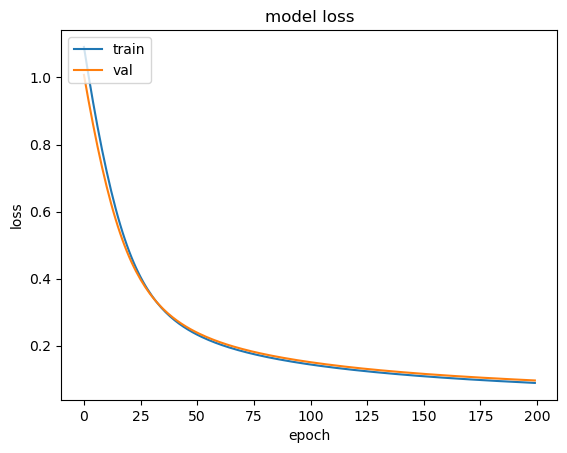

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [40]:
# Évaluation du modèle sur l'ensemble de test
test_loss = model.evaluate(X_test, y_test)
print(f"Loss on test set: {test_loss}")

4/4 [==============================] - 0s 6ms/step - loss: 0.0955
Loss on test set: 0.09551552683115005
